# <font color="redblue">**Analisis de Comparendos de Transito en el Departamendo de Bolivar por el periodo 2019-2013**</font>

##### El presente analisis se aplica a dataset **"Comparendos Impuestos en Bolívar por Tipo de Infracción**, descargado del portal nacional Colombiano de datos abiertos [datos.gov.co](https://www.datos.gov.co/Transporte/Comparendos-Impuestos-en-Bol-var-por-Tipo-de-Infra/hfxy-8gt2/about_data). En este conjunto de Datos se puede visualizar los comparendos Impuestos en Bolívar por Tipo de Infracción ocurridos en el periodo 2019 al 2023, Mes a Mes.
##### A continuacion realizaremos un analitisis descriptivo de los datos donde realizaremos el proceso de ETL y visualizacion de los mismos en periodos anuales. Para ello, haremos uso del Lenguaje Python y sus bibliotecas incorporadas: Numpy, Pandas y Matplotlib 

## <font color="redblue">**1. Lectura, preparacion y normalizacion de los datos**</font>

### <font color="redblue">**1.1 Importacion de bibliotecas y lectura de dataset y almacenado en variable**</font>

In [1]:
#Importamos biliotecas necesarias para ejecutar proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Leemos el dataset objeto de estudio y almacenamos en una variable
archivo_comparendos = (r"\Ricardo\Programacion\Data_Science\Proyectos_DS\comparendos_transito_Bolivar\data\Comparendos_Bolivar_por_Tipo_de_Infraccion.csv")
comparendos = pd.read_csv(archivo_comparendos)
comparendos

,INFRACCCIONES 2019,DESCRIPCION COMP,ENERO 2019,FEBRERO 2019,MARZO 2019,ABRIL 2019,MAYO 2019,JUNIO 2019,JULIO 2019,AGOSTO 2019,...,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,AGOSTO 2023,SEPTIEMBRE 2023,OCTUBRE 2023,NOVIEMBRE 2023,DICIEMBRE 2023,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A02,Agarrarse de otro vehículo en movimiento.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,D02,Conducir sin portar los seguros ordenados por ...,36,236,229,212,300,152,152,216,...,50,70,20,14,2,2,29,3,1,297
293,D13,En caso de transportar carga con peso superior...,0,0,0,0,0,0,0,0,...,0,13,24,22,18,15,13,13,16,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,307,281,271,110,107,132,132,246,...,10,10,4,3,2,4,68,14,9,159
295,C24,Conducir motocicleta sin observar las normas e...,43,42,67,28,37,44,44,66,...,77,190,72,45,0,0,30,2,1,480


### <font color="redblue">**1.1. Analisis y Transformacion del Dtype de las  variables en columnas**</font>

##### Visualizando la informacion del DataFrame, observamos que varias columnas no son del tipo de datos(Dtype) que deberian ser, es decir, tenemos varias columnas con datos numericos representados como de tipo "object", por tanto, se requiere convertirlas a tipo "int".

In [5]:
#Visualizamos informacion del DataFrame
comparendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INFRACCCIONES 2019  297 non-null    object
 1   DESCRIPCION COMP    296 non-null    object
 2   ENERO 2019          297 non-null    int64 
 3   FEBRERO 2019        297 non-null    object
 4   MARZO 2019          297 non-null    object
 5   ABRIL 2019          297 non-null    int64 
 6   MAYO 2019           297 non-null    int64 
 7   JUNIO 2019          297 non-null    int64 
 8   JULIO 2019          297 non-null    int64 
 9   AGOSTO 2019         297 non-null    int64 
 10  SEPTIEMBRE 2019     297 non-null    int64 
 11  OCTUBRE 2019        297 non-null    int64 
 12  NOVIEMBRE 2019      297 non-null    int64 
 13  DICIEMBRE 2019      297 non-null    int64 
 14  TOTAL-19            297 non-null    object
 15  ENERO 2020          297 non-null    int64 
 16  FEBRERO 2020        297 no

In [39]:
#Aislamos las columnas que tienen un tipo de formato que no le corresponde
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]]

,FEBRERO 2019,MARZO 2019,TOTAL-19,JUNIO 2020,TOTAL 2020,TOTAL 2021,TOTAL 2022,TOTAl 2023
0,0,0,0,0,1,0,5,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,2,0
3,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
292,236,229,"2,162",389,"1,586",246,553,297
293,0,0,0,0,1,641,230,160
294,281,271,"2,306",154,"1,611","1,000",245,159
295,42,67,604,279,"1,587",988,571,480


##### Al momento de realizar la trasnformacion del tipo de dato, encontramos algunos datos numericos que contenian caracteres especiales(","); por ende, primero, debemos eliminar esos caracteres para poder transformar a datos numericos.

In [6]:
#Transformamos las columnas de tipo object que tienen caracteres especiales
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]] = comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]].applymap(lambda x: x.replace("," ,""))
comparendos


C:\Users\Pater\AppData\Local\Temp\ipykernel_8568\4118218439.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]] = comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]].applymap(lambda x: x.replace("," ,""))


,INFRACCCIONES 2019,DESCRIPCION COMP,ENERO 2019,FEBRERO 2019,MARZO 2019,ABRIL 2019,MAYO 2019,JUNIO 2019,JULIO 2019,AGOSTO 2019,...,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,AGOSTO 2023,SEPTIEMBRE 2023,OCTUBRE 2023,NOVIEMBRE 2023,DICIEMBRE 2023,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A02,Agarrarse de otro vehículo en movimiento.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,D02,Conducir sin portar los seguros ordenados por ...,36,236,229,212,300,152,152,216,...,50,70,20,14,2,2,29,3,1,297
293,D13,En caso de transportar carga con peso superior...,0,0,0,0,0,0,0,0,...,0,13,24,22,18,15,13,13,16,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,307,281,271,110,107,132,132,246,...,10,10,4,3,2,4,68,14,9,159
295,C24,Conducir motocicleta sin observar las normas e...,43,42,67,28,37,44,44,66,...,77,190,72,45,0,0,30,2,1,480


In [7]:
#Transformamos las columnas de tipo objeto a int64
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]] = comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]].astype(np.int64)
comparendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INFRACCCIONES 2019  297 non-null    object
 1   DESCRIPCION COMP    296 non-null    object
 2   ENERO 2019          297 non-null    int64 
 3   FEBRERO 2019        297 non-null    int64 
 4   MARZO 2019          297 non-null    int64 
 5   ABRIL 2019          297 non-null    int64 
 6   MAYO 2019           297 non-null    int64 
 7   JUNIO 2019          297 non-null    int64 
 8   JULIO 2019          297 non-null    int64 
 9   AGOSTO 2019         297 non-null    int64 
 10  SEPTIEMBRE 2019     297 non-null    int64 
 11  OCTUBRE 2019        297 non-null    int64 
 12  NOVIEMBRE 2019      297 non-null    int64 
 13  DICIEMBRE 2019      297 non-null    int64 
 14  TOTAL-19            297 non-null    int64 
 15  ENERO 2020          297 non-null    int64 
 16  FEBRERO 2020        297 no

### <font color="redblue">**1.3. Seleccion y Transformacion de Columnas y Filas objeto de estudio**</font> 

##### Como nuestro analisis esta enfocado en periodos anuales, procedemos a seleccionar las columnas TOTAL de cada año. Tambien, eliminaremos las filas cuya totalidad de datos se encuentren en "0" en aras de reducir el tamaño del DataFrame.

In [8]:
#Seleccionamos las columnas a las que realizaremos analisis
comparendos_año = comparendos[["INFRACCCIONES 2019", "DESCRIPCION COMP", "TOTAL-19","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]]
comparendos_año

,INFRACCCIONES 2019,DESCRIPCION COMP,TOTAL-19,TOTAL 2020,TOTAL 2021,TOTAL 2022,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,1,0,5,0
1,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,1,0,2,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0
...,...,...,...,...,...,...,...
292,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297
293,D13,En caso de transportar carga con peso superior...,0,1,641,230,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,2306,1611,1000,245,159
295,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480


In [10]:
#Editamos el nombre de las columnas
comparendos_año.columns = ["CODIGO", "COMPARENDO", "AÑO_2019","AÑO_2020","AÑO_2021","AÑO_2022","AÑO_2023"]
comparendos_año


,CODIGO,COMPARENDO,AÑO_2019,AÑO_2020,AÑO_2021,AÑO_2022,AÑO_2023
0,A01,No transitar por la derecha de la vía,0,1,0,5,0
1,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,1,0,2,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0
...,...,...,...,...,...,...,...
292,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297
293,D13,En caso de transportar carga con peso superior...,0,1,641,230,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,2306,1611,1000,245,159
295,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480


In [11]:
#Filtramos las filas que contienen datos irrelevantes (todas las filas con totalidad de campos con valor 0)
comparendos_remover = comparendos_año.query("AÑO_2019==0 & AÑO_2020==0 & AÑO_2021==0 & AÑO_2022==0 & AÑO_2023==0").index
comparendos_remover


Index([  4,   5,   6,   8,   9,  10,  11,  16,  17,  19,
       ...
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275],
      dtype='int64', length=233)

In [12]:
#Eliminamos filas innecesarias
comparendos_año.drop(comparendos_remover, axis=0, inplace=True)

#Eliminmos ultima fila del DataFrame("ToTal")
comparendos_año = comparendos_año.drop(index=296)

C:\Users\Pater\AppData\Local\Temp\ipykernel_8568\1428384992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparendos_año.drop(comparendos_remover, axis=0, inplace=True)


In [13]:
#Verificamos eliminacion de filas
comparendos_año.query("AÑO_2019==0 & AÑO_2020==0 & AÑO_2021==0 & AÑO_2022==0 & AÑO_2023==0")

,CODIGO,COMPARENDO,AÑO_2019,AÑO_2020,AÑO_2021,AÑO_2022,AÑO_2023


In [ ]:
#Creamos nueva columna para totalizar comparendos 
comparendos_año["TOTAL"] = comparendos_año["AÑO_2019"]+comparendos_año["AÑO_2020"]+comparendos_año["AÑO_2021"]+comparendos_año["AÑO_2022"]+comparendos_año["AÑO_2023"]

#Editamos nuevamente nombre de columnas para mejor visualizacion
comparendos_año.columns = ["CODIGO", "COMPARENDO", "2019","2020","2021","2022","2023", "TOTAL"]

#Presentamos el DtataFrame por orden ascendente de la coumna "TOTAL" 
comparendos_año = comparendos_año.sort_values(by="TOTAL", ascending=True).reset_index(drop=True)
comparendos_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,G02,Los peatones y ciclistas que no cumplan con la...,0,0,0,0,1,1
1,D09,No permitir el paso de los vehículos de emerge...,0,0,0,0,1,1
2,D11,Permitir el servicio público de pasajeros que ...,1,0,0,0,0,1
3,C19,Dejar o recoger pasajeros en sitios distintos ...,1,0,0,0,0,1
4,C16,Conducir un vehículo escolar sin el permiso re...,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
58,D12,"Conducir un vehículo que, sin la debida autori...",398,12,310,559,246,1525
59,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319,3559
60,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480,4230
61,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297,4844


In [202]:
comparendos_año.query("TOTAL<10")

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,G02,Los peatones y ciclistas que no cumplan con la...,0,0,0,0,1,1
1,D09,No permitir el paso de los vehículos de emerge...,0,0,0,0,1,1
2,D11,Permitir el servicio público de pasajeros que ...,1,0,0,0,0,1
3,C19,Dejar o recoger pasajeros en sitios distintos ...,1,0,0,0,0,1
4,C16,Conducir un vehículo escolar sin el permiso re...,1,0,0,0,0,1
5,C08,Transitar sin los dispositivos luminosos reque...,0,0,1,0,0,1
6,F06,Actuar de manera que ponga en peligro su integ...,0,0,1,0,0,1
7,H01,Circular portando defensas rígidas diferentes ...,0,0,1,0,0,1
8,B10,"Conducir un vehículo con vidrios polarizados, ...",1,0,0,0,0,1
9,C36,Transportar carga en contenedores sin los disp...,0,0,1,0,0,1


### **<font color="redblue">1.4. Analisis estadistico</font>**

In [15]:
#Visualizamos descripcion estadistica de los datos
comparendos_año.describe()

,2019,2020,2021,2022,2023,TOTAL
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,146.968254,103.253968,66.571429,47.698413,28.587302,393.079365
std,468.727687,350.528309,197.746638,140.241340,88.172601,1127.234545
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,1.000000,1.000000,0.000000,8.000000
75%,24.500000,2.000000,11.500000,8.000000,4.500000,49.000000
max,2306.000000,1611.000000,1000.000000,571.000000,480.000000,5321.000000


##### **Analisis de las descripcion**
* Hay una tendencia decreciente en el número de comparendos emitidos cada año desde 2019 hasta 2023.
* La variabilidad en el número de comparendos emitidos se ha reducido considerablemente con el tiempo.
* Aunque el valor máximo ha disminuido, el hecho de que haya años con 0 comparendos sugiere que hay períodos o lugares donde no se han emitido comparendos.
* La mayor parte de los datos muestra una disminución en el número de comparendos emitidos, destacando una tendencia general hacia una menor emisión de comparendos.

##### Conforme a lo analizado anteriormente, procedemos a graficar el histograma para ver la frecuencia de los datos anuales

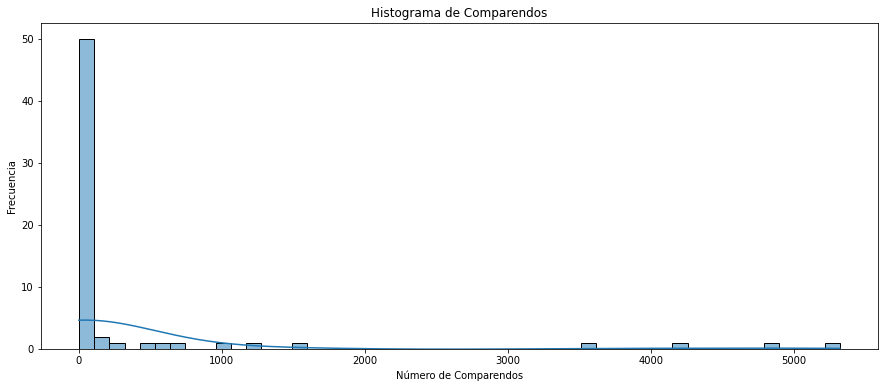

In [204]:
# Histograma con Seaborn
plt.figure(figsize=(15, 6))
sns.histplot(comparendos_año['TOTAL'], bins=50, kde=True)
plt.title('Histograma de Comparendos')
plt.xlabel('Número de Comparendos')
plt.ylabel('Frecuencia')
plt.show()


##### Podemos ver que la cola del histograma está hacia la derecha. Esto indica que, a pesar que eliminamos una cantidad considerable de filas de comparendos que totalizaban en cero("0") aun hay valores extremos bajos; lo cual, significa un sesgo a la izquierda. Por tanto, procedemos a realizar una graficas preliminares para ver como se visualizan.

### <font color="redblue">**1.5. Visualizacion preliminar**</font>

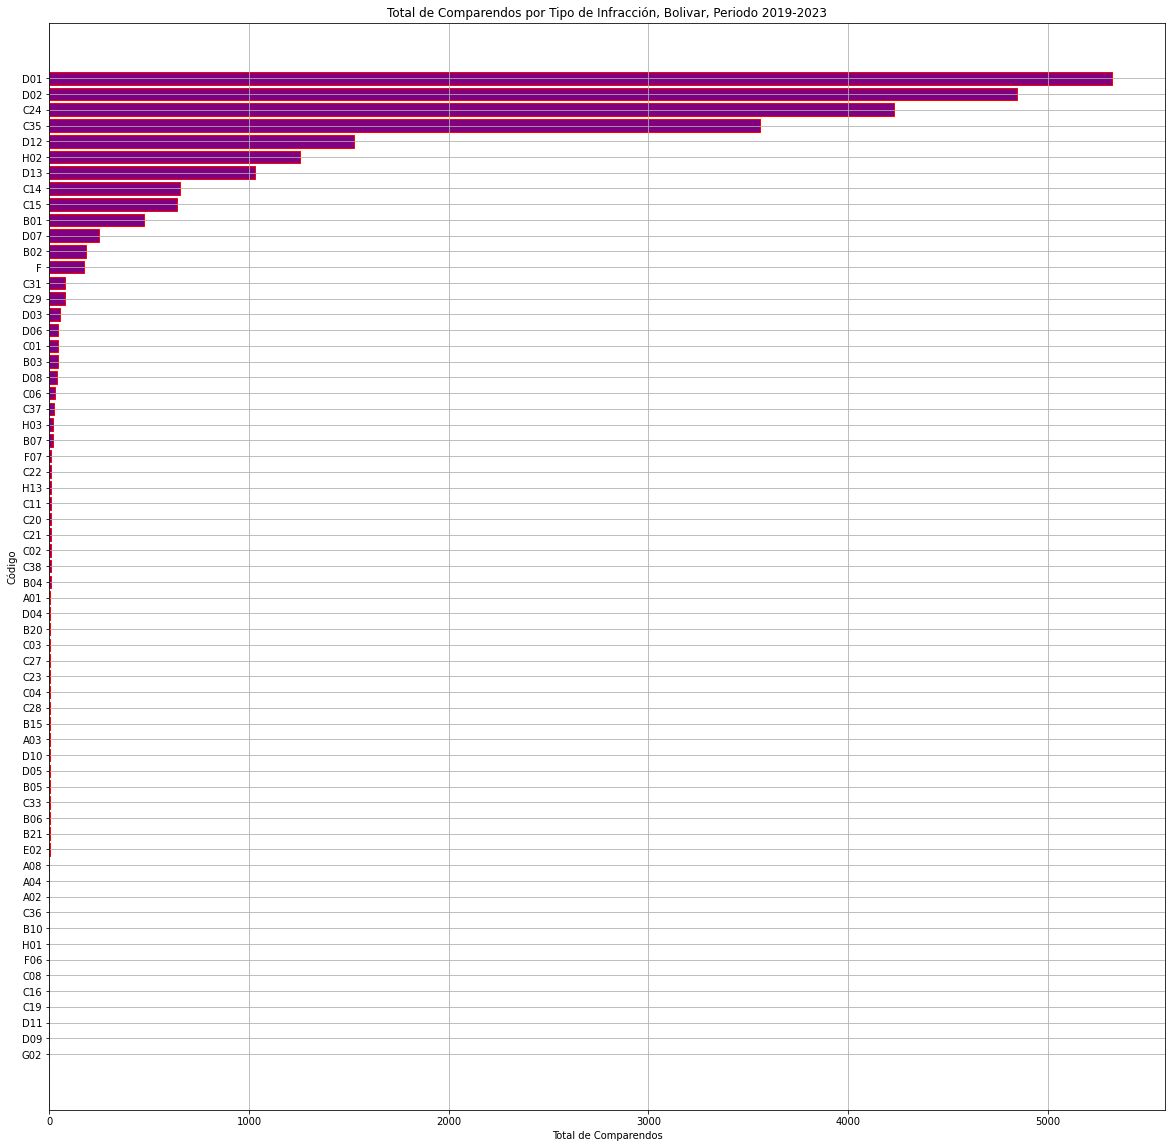

In [16]:
#Grafico de barras preliminar
plt.figure(figsize=(20,20))
plt.barh(comparendos_año["CODIGO"], comparendos_año["TOTAL"], color="purple", edgecolor='red')
plt.title('Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.grid(visible=True)
plt.xlabel('Total de Comparendos')
plt.ylabel('Código')
plt.show()

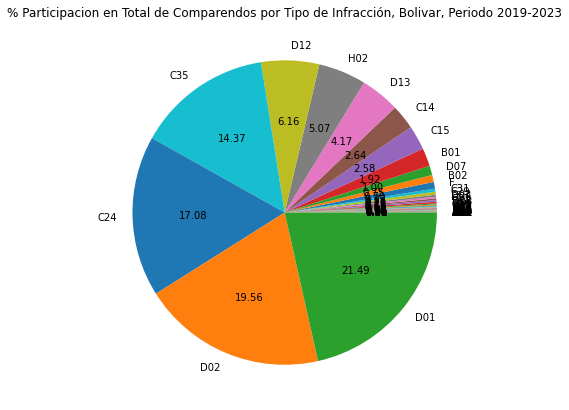

In [17]:
#Diagrama de Tortas preliminar
plt.figure(figsize=(15,7))
plt.pie(comparendos_año["TOTAL"], labels=comparendos_año["CODIGO"], autopct='%.2f')
plt.title('% Participacion en Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.show()

### <font color="redblue">**1.6. Criterios de seleccion de muestra de datos a visualizar**</font>

##### En vista del sesgo a la izquierda y de la ilegibilidad de los graficos, procedemos a seleccionar una muestra representativa del total de comparendos. Por tanto, decidimos trabajar con datos de comparendos cuyo Total corresponda al 0,99% o mas del total de comparendos en general.

In [18]:
#Filtramos columna "TOTAL" que contengan datos mayores al 1% del Total de la columna
comparendos_año[["CODIGO","COMPARENDO","TOTAL"]].sort_values("TOTAL", ascending=True)

df_comparendo_año = comparendos_año.query("TOTAL > ((TOTAL.sum())*0.0099)").reset_index(drop=True)
df_comparendo_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,D07,Conducir realizando maniobras altamente peligr...,139,41,28,33,6,247
1,B01,Conducir un vehículo sin llevar consigo la lic...,334,71,60,8,3,476
2,C15,"Conducir un vehículo, particular o de servicio...",238,200,156,29,15,638
3,C14,Transitar por sitios restringidos o en horas p...,78,443,65,58,10,654
4,D13,En caso de transportar carga con peso superior...,0,1,641,230,160,1032
5,H02,El conductor que no porte la licencia de tráns...,535,388,293,26,13,1255
6,D12,"Conducir un vehículo que, sin la debida autori...",398,12,310,559,246,1525
7,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319,3559
8,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480,4230
9,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297,4844


#### El siguiente analisis nos demuestra que la muestra seleccionada corresponde al 96.03% de la poblacion de estudio

In [21]:
total_comparendos_original = comparendos_año["TOTAL"].sum()
print(f"El total de comparendos de la poblacion es {total_comparendos_original}")
total_comparendos_filtrado = df_comparendo_año["TOTAL"].sum()
print(f"El total de comparendos de la muestra es {total_comparendos_filtrado}")
porcentaje_muestra = round(((total_comparendos_filtrado/total_comparendos_original)*100),2)
print(f"La representacion de la muestra en el total de comparendos es del {porcentaje_muestra}%")

El total de comparendos de la poblacion es 24764
El total de comparendos de la muestra es 23781
La representacion de la muestra en el total de comparendos es del 96.03%


### <font color="redblue">**1.7. Transformacion del DataFrame de la Muestra**</font>

##### Procedemos a editar las descripciones de los comparendos para hacer mas legible el DataFrame y posterior visualizacion

In [22]:
#Listamos datos de la columna "COMPARENDO" a editar
df_comparendo_año["COMPARENDO"].unique()

array(['Conducir realizando maniobras altamente peligrosas, siempre y cuando la maniobra viole las normas de transito que pongan en peligro a las personas o las cosas y que constituyan conductas dolosas o altamente imprudentes.',
       'Conducir un vehículo sin llevar consigo la licencia de conducción',
       'Conducir un vehículo, particular o de servicio público, excediendo la capacidad autorizada en la licencia de tránsito o tarjeta de operación',
       'Transitar por sitios restringidos o en horas prohibidas por la autoridad competente. Además, el vehículo será inmovilizado',
       'En caso de transportar carga con peso superior al autorizado el vehículo será inmovilizado y el exceso deberá ser transbordado. La licencia de conducción será suspendida hasta por seis (6) meses',
       'El conductor que no porte la licencia de tránsito, Además el vehículos será inmovilizado',
       'Conducir un vehículo que, sin la debida autorización, se destine a un servicio diferente de aquel 

In [23]:
#Transformamos las descripciones de los datos de columa "COMPARENDO" para mejorar legibilidad
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Transitar por sitios restringidos o en horas prohibidas por la autoridad competente. Además, el vehículo será inmovilizado","Transitar por sitio u hora restringida")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo sin llevar consigo la licencia de conducción","Conducir un vehículo con la licencia de conducción vencida.")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("El conductor que no porte la licencia de tránsito, Además el vehículos será inmovilizado","No portar la licencia de conducción")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo, particular o de servicio público, excediendo la capacidad autorizada en la licencia de tránsito o tarjeta de operación", "Conducir vehículo con sobrecupo")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo que, sin la debida autorización, se destine a un servicio diferente de aquel para el cual tiene licencia de tránsito. Además, el vehículo será inmovilizado por primera vez, por el término de cinco días, por segunda vez veinte días y por tercera vez cuarenta días","Conducir vehículo destinado a servicio diferente al autorizado")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir sin portar los seguros ordenados por la ley. Además, el vehículo será inmovilizado", "Conducir sin el SOAT")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("En caso de transportar carga con peso superior al autorizado el vehículo será inmovilizado y el exceso deberá ser transbordado. La licencia de conducción será suspendida hasta por seis (6) meses", "Transportar carga con peso superior al autorizado")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que éste sea retirado por una persona autorizada por el infractor con licencia de conducción", "Conducir sin tener licencia de conducción correspondiente")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir motocicleta sin observar las normas establecidas en el presente código", "Conducir motocicleta sin observar las normas")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].apply(lambda x: x.replace("No realizar la revisión tecnicomecánica y de emisión contaminantes en los siguientes plazos o cuando aun portando los certificados correspondientes no cuenta  con las siguientes condiciones técnicomecánica y de emisiones contaminantes, además el vehículo será inmovilizado.", "No tener revisión tecnicomecánica"))
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].apply(lambda x: x.replace("Conducir realizando maniobras altamente peligrosas, siempre y cuando la maniobra viole las normas de transito que pongan en peligro a las personas o las cosas y que constituyan conductas dolosas o altamente imprudentes", "Conducir realizando maniobras altamente peligrosas"))

df_comparendo_año["COMPARENDO"].unique()

array(['Conducir realizando maniobras altamente peligrosas.',
       'Conducir un vehículo con la licencia de conducción vencida.',
       'Conducir vehículo con sobrecupo',
       'Transitar por sitio u hora restringida',
       'Transportar carga con peso superior al autorizado',
       'No portar la licencia de conducción',
       'Conducir vehículo destinado a servicio diferente al autorizado',
       'No tener revisión tecnicomecánica',
       'Conducir motocicleta sin observar las normas',
       'Conducir sin el SOAT',
       'Conducir sin tener licencia de conducción correspondiente'],
      dtype=object)

### <font color="redblue">**1.8. DataFrame Final - Comparendos de Transito en Bolivar por el Perido 2019-2023**</font>

In [211]:
#Imprimimos DataFrame final con el cual realizaremos las visualizaciones
df_comparendo_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,D07,Conducir realizando maniobras altamente peligr...,139,41,28,33,6,247
1,B01,Conducir un vehículo con la licencia de conduc...,334,71,60,8,3,476
2,C15,Conducir vehículo con sobrecupo,238,200,156,29,15,638
3,C14,Transitar por sitio u hora restringida,78,443,65,58,10,654
4,D13,Transportar carga con peso superior al autorizado,0,1,641,230,160,1032
5,H02,No portar la licencia de conducción,535,388,293,26,13,1255
6,D12,Conducir vehículo destinado a servicio diferen...,398,12,310,559,246,1525
7,C35,No tener revisión tecnicomecánica,1990,516,189,545,319,3559
8,C24,Conducir motocicleta sin observar las normas,604,1587,988,571,480,4230
9,D02,Conducir sin el SOAT,2162,1586,246,553,297,4844


In [24]:
#Visualizados descripcion estadistica de los datos
df_comparendo_año.describe()

,2019,2020,2021,2022,2023,TOTAL
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,798.545455,586.909091,361.454545,259.727273,155.272727,2161.909091
std,891.100821,670.829107,355.107410,248.651198,163.431999,1923.861141
min,0.000000,1.000000,28.000000,8.000000,3.000000,247.000000
25%,188.500000,56.000000,110.500000,31.000000,11.500000,646.000000
50%,398.000000,388.000000,246.000000,230.000000,159.000000,1255.000000
75%,1297.000000,1051.000000,475.500000,549.000000,271.500000,3894.500000
max,2306.000000,1611.000000,1000.000000,571.000000,480.000000,5321.000000


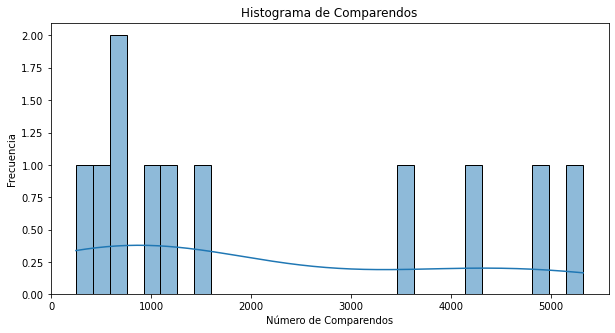

In [28]:
# Realizamos Histograma con Seaborn
plt.figure(figsize=(10, 5))
sns.histplot(df_comparendo_año['TOTAL'], bins=30, kde=True)
plt.title('Histograma de Comparendos')
plt.xlabel('Número de Comparendos')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
#Exportamos DataFRame Final
df_comparendo_año.to_csv("D:\Ricardo\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\dataframes\\comparendos_de_Transito_Bolivar_2019-2023.csv", index=False)

## <font color="redblue">**2. Visualizacion de los datos**</font> 

##### En esta segunda etapa procedemos a realizar las visualizaciones graficas del DataFrame final

### <font color="redblue">**2.1. Grafico de barras**</font>

In [30]:
df_comparendo_barh = df_comparendo_año[["COMPARENDO", "TOTAL"]].sort_values(ascending=True, by="TOTAL")
df_comparendo_barh

,COMPARENDO,TOTAL
0,Conducir realizando maniobras altamente peligr...,247
1,Conducir un vehículo con la licencia de conduc...,476
2,Conducir vehículo con sobrecupo,638
3,Transitar por sitio u hora restringida,654
4,Transportar carga con peso superior al autorizado,1032
5,No portar la licencia de conducción,1255
6,Conducir vehículo destinado a servicio diferen...,1525
7,No tener revisión tecnicomecánica,3559
8,Conducir motocicleta sin observar las normas,4230
9,Conducir sin el SOAT,4844


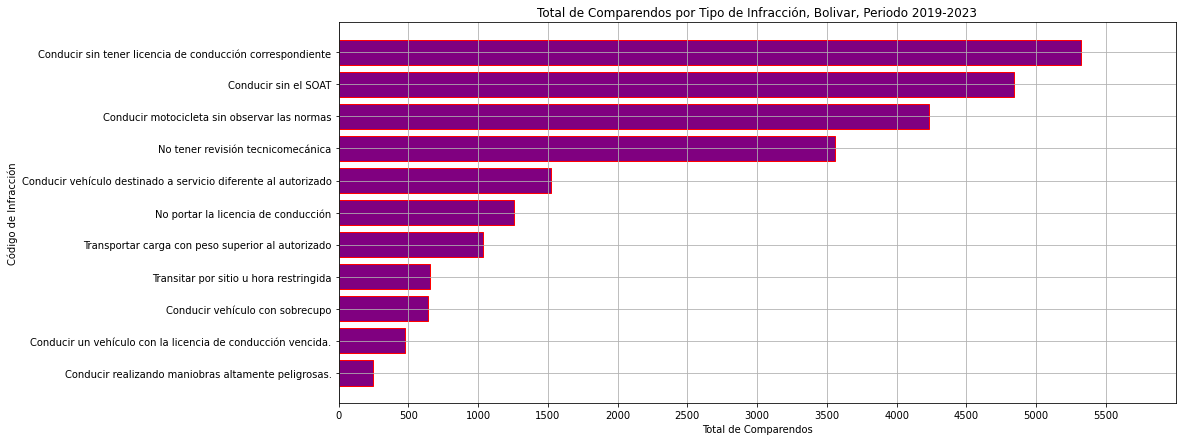

In [31]:
#Grafico de barras
plt.figure(figsize=(15,7))
plt.barh(df_comparendo_barh["COMPARENDO"], df_comparendo_barh["TOTAL"], color="purple", edgecolor='red')
plt.title('Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.grid(visible=True)
plt.xlabel('Total de Comparendos')
plt.ylabel('Código de Infracción')
plt.xlim(0,6000)
plt.xticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500], labels=["0", "500", "1000", "1500","2000","2500","3000","3500","4000","4500","5000", "5500"])
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_barh.png")
plt.show()


### <font color="redblue">**2.2. Grafico de Tortas**</font>

In [36]:
df_comparendo_pie = df_comparendo_año[["COMPARENDO", "TOTAL"]].sort_values(ascending=True, by="TOTAL" )
df_comparendo_pie

,COMPARENDO,TOTAL
0,Conducir realizando maniobras altamente peligr...,247
1,Conducir un vehículo con la licencia de conduc...,476
2,Conducir vehículo con sobrecupo,638
3,Transitar por sitio u hora restringida,654
4,Transportar carga con peso superior al autorizado,1032
5,No portar la licencia de conducción,1255
6,Conducir vehículo destinado a servicio diferen...,1525
7,No tener revisión tecnicomecánica,3559
8,Conducir motocicleta sin observar las normas,4230
9,Conducir sin el SOAT,4844


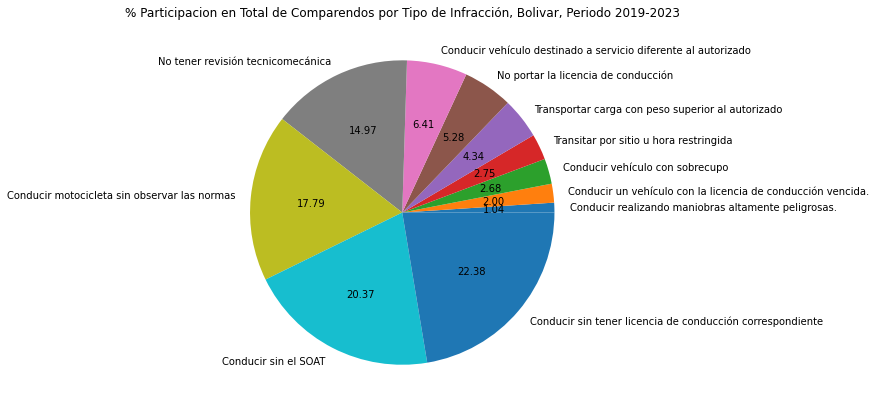

In [37]:
#Grafico de Tortas
plt.figure(figsize=(15,7))
plt.pie(df_comparendo_pie["TOTAL"], labels=df_comparendo_pie["COMPARENDO"], autopct='%.2f')
plt.title('% Participacion en Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.grid(True)
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_pie.png")
plt.show()

### <font color="redblue"> **2.3. Grafico de lineas**</font>

In [38]:
#Filtramos columnas con las cuales vamos a trabajar
df_comparendo_lineas = df_comparendo_año[["COMPARENDO", "2019",	"2020", "2021", "2022", "2023"]].reset_index(drop=True)
df_comparendo_lineas

,COMPARENDO,2019,2020,2021,2022,2023
0,Conducir realizando maniobras altamente peligr...,139,41,28,33,6
1,Conducir un vehículo con la licencia de conduc...,334,71,60,8,3
2,Conducir vehículo con sobrecupo,238,200,156,29,15
3,Transitar por sitio u hora restringida,78,443,65,58,10
4,Transportar carga con peso superior al autorizado,0,1,641,230,160
5,No portar la licencia de conducción,535,388,293,26,13
6,Conducir vehículo destinado a servicio diferen...,398,12,310,559,246
7,No tener revisión tecnicomecánica,1990,516,189,545,319
8,Conducir motocicleta sin observar las normas,604,1587,988,571,480
9,Conducir sin el SOAT,2162,1586,246,553,297


In [40]:
#Transformamos DataFrame para realizar grafico de lineas
melt_df = pd.melt(df_comparendo_lineas, id_vars=["COMPARENDO"], var_name="AÑO", value_name="TOTAL")
melt_df

,COMPARENDO,AÑO,TOTAL
0,Conducir realizando maniobras altamente peligr...,2019,139
1,Conducir un vehículo con la licencia de conduc...,2019,334
2,Conducir vehículo con sobrecupo,2019,238
3,Transitar por sitio u hora restringida,2019,78
4,Transportar carga con peso superior al autorizado,2019,0
5,No portar la licencia de conducción,2019,535
6,Conducir vehículo destinado a servicio diferen...,2019,398
7,No tener revisión tecnicomecánica,2019,1990
8,Conducir motocicleta sin observar las normas,2019,604
9,Conducir sin el SOAT,2019,2162


In [42]:
#Agrupamos datos totalizando los comparendos por año
comparendo_anual= melt_df.groupby('AÑO').TOTAL.sum().reset_index()
comparendo_anual

,AÑO,TOTAL
0,2019,8784
1,2020,6456
2,2021,3976
3,2022,2857
4,2023,1708


In [46]:
# Gráfico de líneas para el total de comparendos en Bolivar para el periodo 2019-2023
fig_lineas=px.line(comparendo_anual, x="AÑO", y="TOTAL", title='Tendencia de Comparendos por Año - Departamento de Bolivar, periodo 2019-2023', markers="o", line_shape="spline", width=800.0, height=400.0)
fig_lineas

### <font color="redblue"> **2.3. Grafico de dispersion**</font>

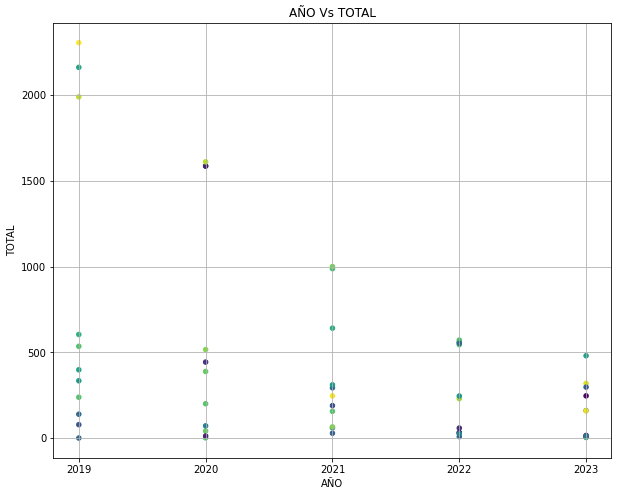

In [ ]:
colors= np.random.rand(55)

#Creamos grafico de dispersion
plt.figure(figsize=(10,8))
plt.scatter(melt_df["AÑO"], melt_df["TOTAL"], s= 20, c=colors, cmap="viridis", vmin=0, vmax=1)
plt.grid(True)

#Editamos Titulos del grafico y de Etiquetas
plt.title("AÑO Vs TOTAL")
plt.xlabel("AÑO")
plt.ylabel("TOTAL")

#Guardamos grafico en carpeta y visualizamos
#plt.savefig("D:\Ricardo\\Programacion\\Data_Science\\Talentech\\Analisis_de_datos\\Practica\\Mision2_Sem6\\Graficos\\graficoDispersion.png")
plt.show()